In [1]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data.

df_income = pd.read_csv('adult.csv')
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The data reflects that it contains the categorical as well as numerical data having 32561 rows andd 15 columns.

In [3]:
df_income.shape

(32561, 15)

In [4]:
# Let's check the data types of each feature.

df_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

The datset has 5 features having 'int64' data type and rest having 'object' data type.

So, below are the details of each feature of the dataset.



In [5]:
# Let's use the describe function to check the statistical summary of the dataset.

df_income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


OBSERVATIONS :
    
    1. The median of capital agin and capital loss is 0.
    2. There are outliers present in the dataset as there is huge differrence between the max. value and the 75% value of the variables having continous nature.
    3. There is a variety of range among th variables as capital gain is having a high range which shows the huge spread of data.
    4. There is a normal distribution ofvariables in the data as the mean is more than the median but there is a slight difference between the two.

In [6]:
# Let's check the null values.

df_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

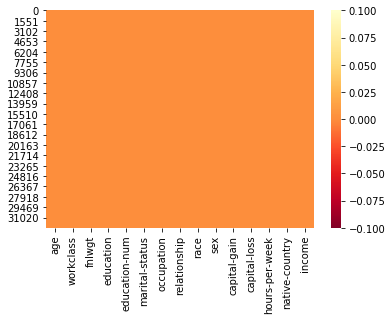

In [7]:
# Visualizing the null values using heatmap.

sns.heatmap(df_income.isnull(), cmap = 'YlOrRd_r')
plt.show()

From above, it's clear that there are no null values present in the dataset.

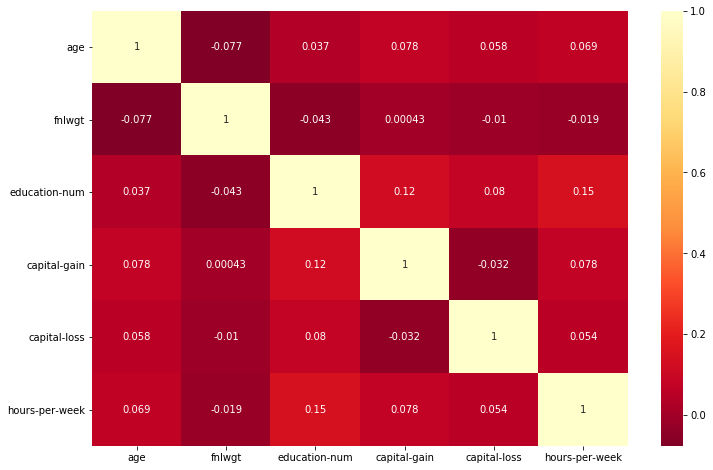

In [9]:
# Let's Visualize the correlation using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(df_income.corr(), cmap= "YlOrRd_r", annot= True)

Observations :-
    
    1. The sample weight i.e. 'fnlwgt' is negatively related with other variables.
    2. The numeric variables are not strongly correlated.
    3. Neither the strong positive nor the strong negative correlation present in any variable .
    4. There is a good correlation of education-num with hours per week and capital gain.

In [11]:
# Let's check the numerical data from the dataset.

inc_num = df_income.select_dtypes(exclude='object')
inc_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [12]:
# Let's check the categorical data from the dataset.

inc_cat = df_income.select_dtypes(include='object')
inc_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [13]:
# Let's check  the value counts of each categorical feature.

for i in inc_cat.columns:
    x = inc_cat[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- workclass --------
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


-------- education --------
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


-------- marital-status --------
  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: mar

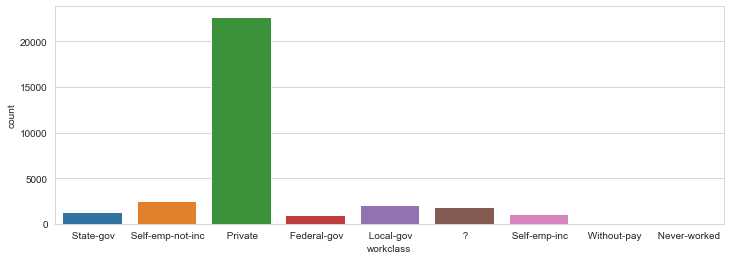

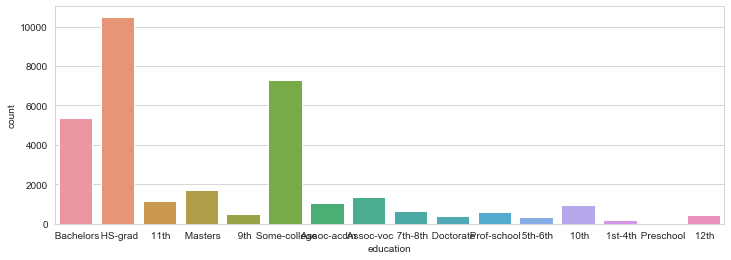

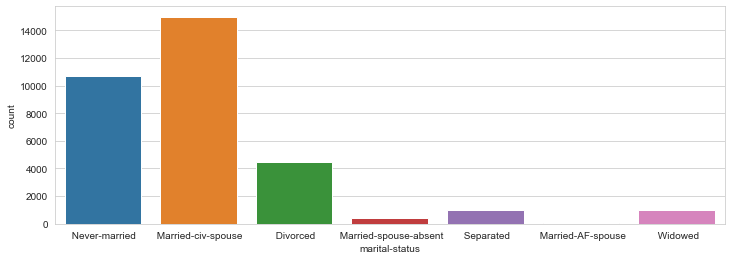

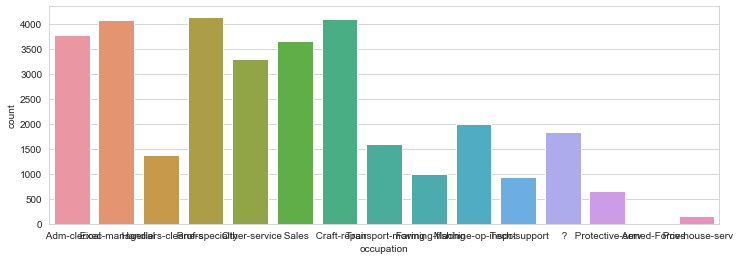

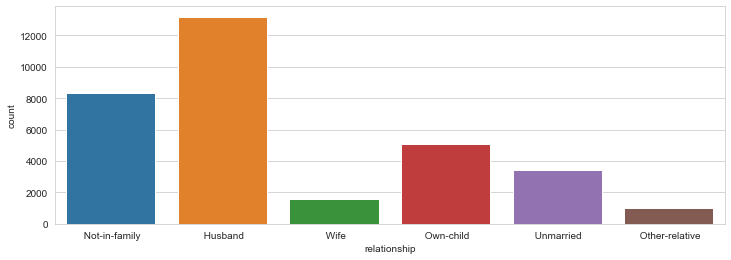

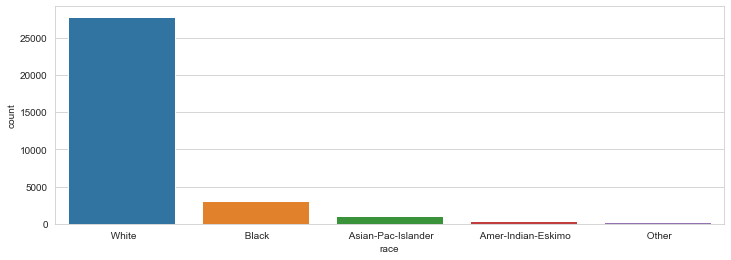

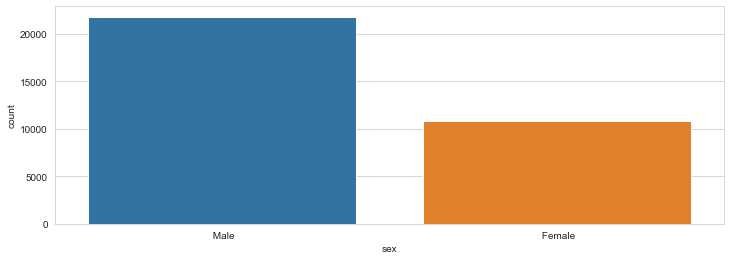

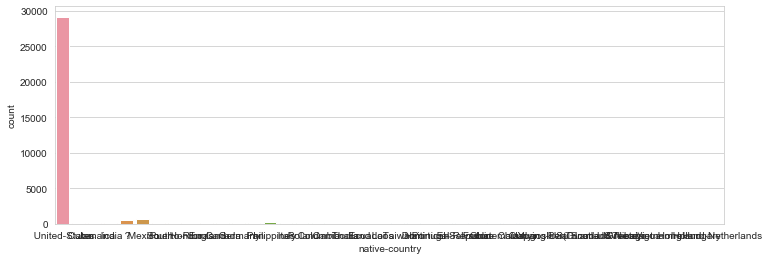

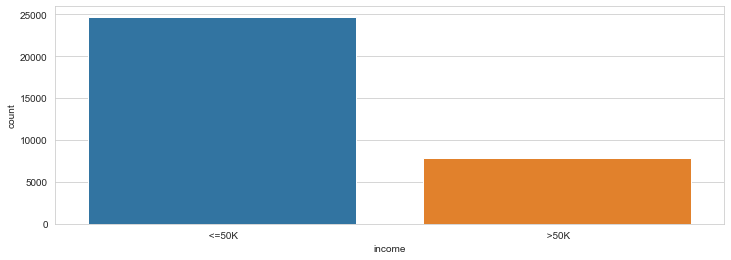

In [14]:
# UNIVARIATE ANALYSIS
# Visualizing the counts of each categorical column/feature.

for i in inc_cat.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,4))
    x = sns.countplot(inc_cat[i],data=inc_cat)
    plt.show()

OBSERVATIONS from the above visualizationof value capounts of categorical features:
    
    1. workclass -  The count of individuals working in a private sector is high as compared to other sectors.
    2. education  - The count of individuals having HS-grad are more follwed by the individuals having some-college, followed by bachelor people.
    3. marital-status -  The individual Marries-civ-spouse are more followed by the individuals never-married. The count of divorced inviduals  is above 4000.
    4. occupation  - The count of  individuals working as a Prof-specialty id higest in the data followed by individuals working as a Craft-repair > Exec-managerial > Adm-clerical > Sales > Other-service.
    5. relationship  - The count of individuals as husband is approx. 13200 followed by individuals not-in-family as compared to other individual's relationship.
    6. race  - The count of white individuals is high.
    7. sex - The count of females is alost half of the count of males.
    8. native-country - The majority of individuals belongs to United-States.
    9. income - The no. of individuals have income of more than or equal to 50k.

In [15]:
inc_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

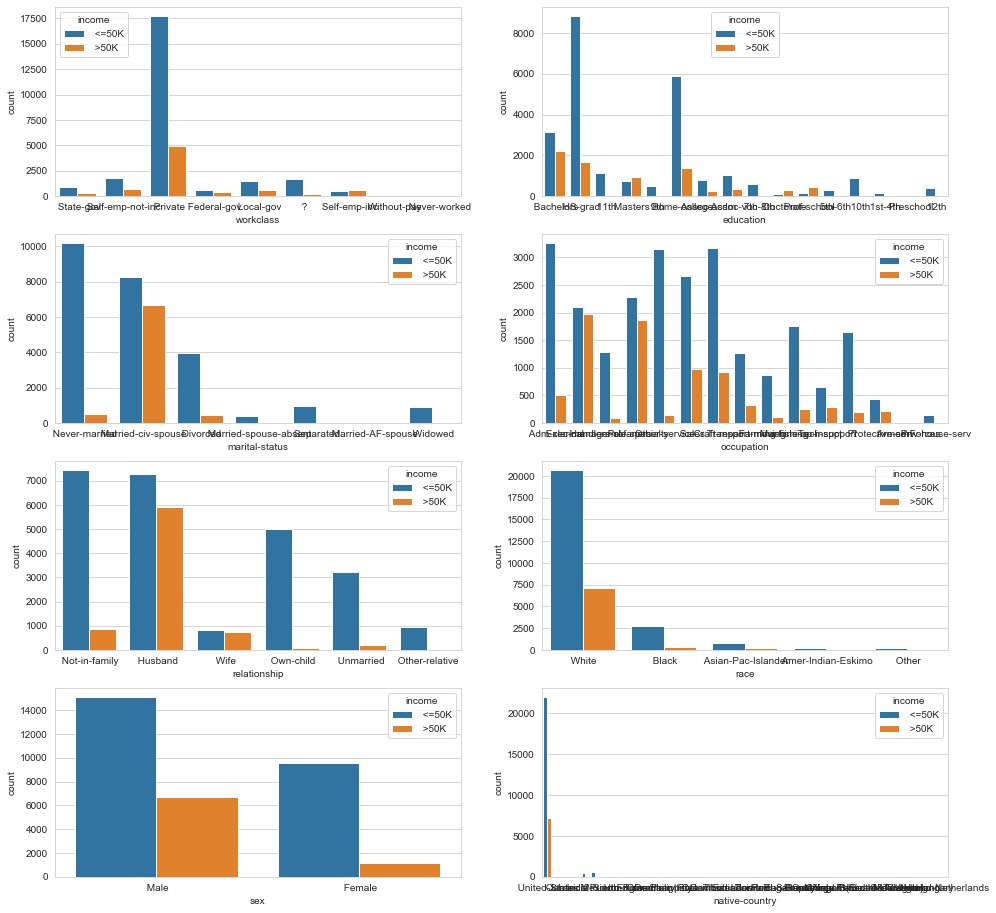

In [16]:
fig,ax = plt.subplots(4,2, figsize=(16,16))               
sns.countplot(x = "workclass", hue = "income", data = df_income, ax = ax[0,0]) 
sns.countplot(x = "education", hue = "income", data = df_income, ax = ax[0,1]) 
sns.countplot(x = "marital-status", hue = "income", data = df_income, ax = ax[1,0]) 
sns.countplot(x = "occupation", hue = "income", data = df_income, ax = ax[1,1])
sns.countplot(x = "relationship", hue = "income", data = df_income, ax = ax[2,0]) 
sns.countplot(x = "race", hue = "income", data = df_income, ax = ax[2,1]) 
sns.countplot(x = "sex",  hue = "income", data = df_income, ax = ax[3,0]) 
sns.countplot(x = "native-country",hue = "income", data = df_income, ax = ax[3,1]) 
plt.show()

From above, it is clear that every feature is having the max. count of individuals having income of more than or equal to 50k in the respective categories.

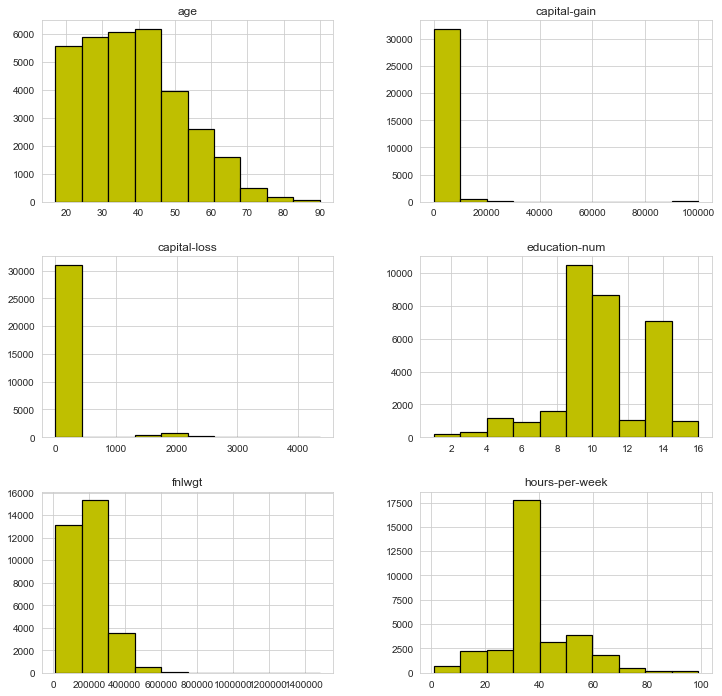

In [17]:
# Distribution of Different Features of the Dataset

distribution = inc_num.hist(edgecolor = 'black', linewidth = 1.2, color = 'y')
fig = plt.gcf()
fig.set_size_inches(12,12)

OBSERVATIONS from the above visualization of of numerical features:
    
    1. age - The majority age of individuals is between 20 yrs. - 45 yrs.
    2. capital-gain and capital- loss, both are equal to 0.
    3. The majority of individual works 40 hours per week.
    4. fnlwgt - The sample weight distribution ismaximum at 200000.
    5. education-num - the distribution is majorly at 9 value.

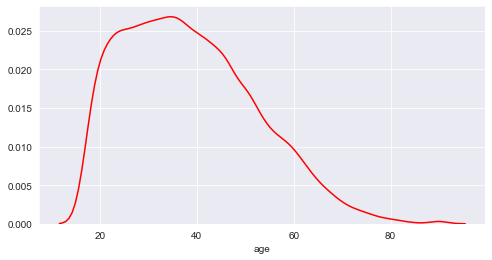

In [18]:
# Let's check the distribution of age using distribution plot.

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.distplot(df_income['age'], color='red', hist = False)

The age is sort of rightly skewed but there is a normal distributin at 37.

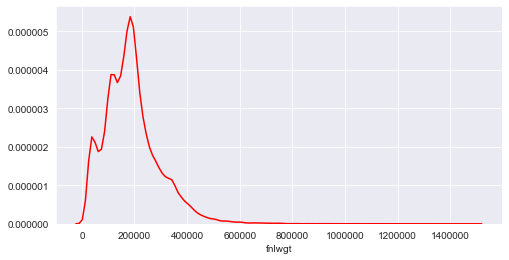

In [19]:
# Let's check the distribution of sample weight using distribution plot.

plt.figure(figsize=(8,4))
sns.distplot(df_income['fnlwgt'], color='red', hist = False)

The sample weight is maximaunm at value 200000 but it is not normally distributed.

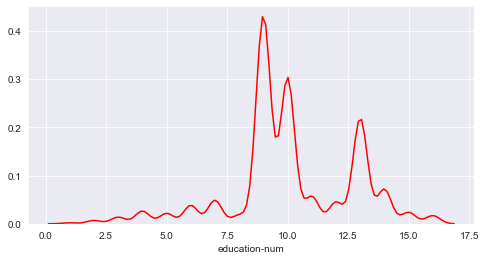

In [20]:
# Let's check the distribution of education-num using distribution plot.

plt.figure(figsize=(8,4))
sns.distplot(df_income['education-num'], color='red', hist = False)

There is a variation in the distribution of education-num. it is need to be treated.

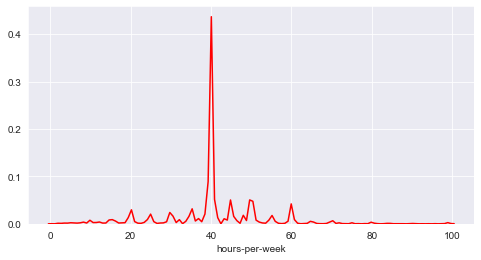

In [21]:
# Let's check the distribution of hours-per-week using distribution plot.

plt.figure(figsize=(8,4))
sns.distplot(df_income['hours-per-week'], color = 'red', hist = False)

40 hours is the maximum per week worked by the individuals.

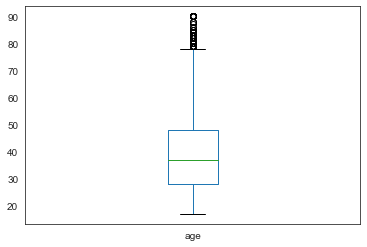

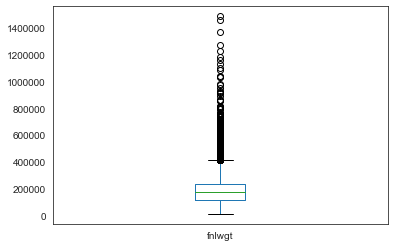

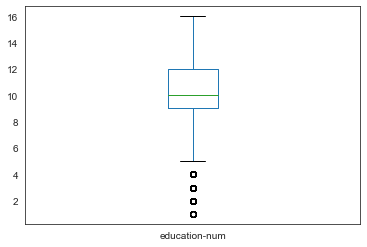

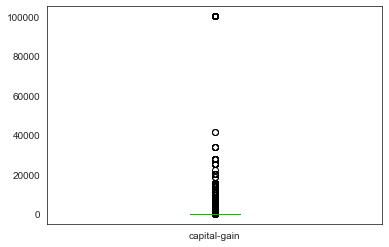

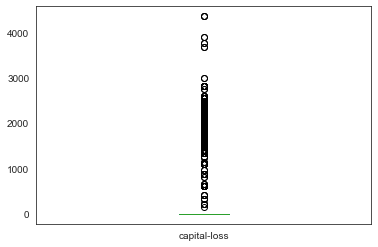

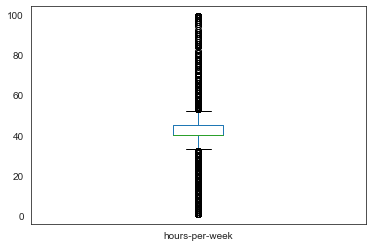

In [22]:
# Let's plot the outliers

for i in inc_num.columns:
    sns.set_style('white')
    x = inc_num[i].plot.box()
    plt.show()

OBSERVATIONS :
    
    1. The above boxplot shows that outliers are present in all the numerical columns/features which needs to be removed.
    2. The maximum age is approx. 80 years and the median is 35 yrs. of age.
    3. The median of sample weight is 200000 and the min. - max. sample weight is 0 - 400000.
    4. There are less outliers present in the education-num as compared to other numerical features.
    5. capital loss and capital gain have 0 value and as there are a lot of outiers so these 2 can be removed from the dataset as they are not contributing in the dataset.

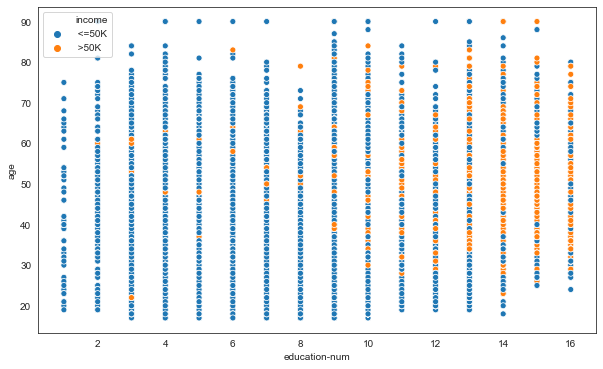

In [23]:
# BIVARIATE ANALYSIS
# Let's check the relationship of education-num and age having hue as target variable.

plt.figure(figsize=(10,6))
x = sns.scatterplot(x = 'education-num' ,y = "age",hue = 'income', data = df_income)
plt.show()

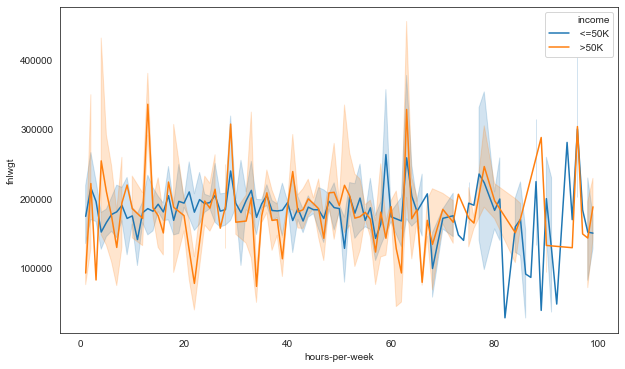

In [24]:
# Let's check the relationship of hours-per-week and sample weight having hue as target variable.

plt.figure(figsize=(10,6))
x = sns.lineplot(x = 'hours-per-week' ,y = "fnlwgt",hue = 'income', data = df_income)
plt.show()

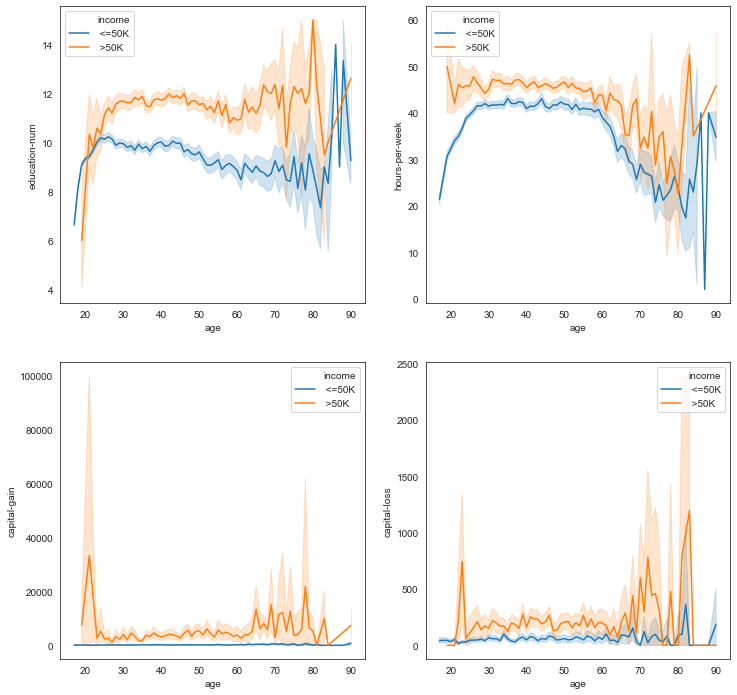

In [25]:
# Let's check the relationship of age with other numerical variables with hue as a target variable.

fig,ax = plt.subplots(2,2, figsize=(12,12))               
sns.lineplot(x="age", y="education-num", hue="income",data=df_income,ax = ax[0,0]) 
sns.lineplot(x="age", y="hours-per-week", hue="income",data=df_income, ax = ax[0,1]) 
sns.lineplot(x="age", y="capital-gain",hue="income",data=df_income, ax = ax[1,0]) 
sns.lineplot(x="age", y="capital-loss",hue="income",data=df_income, ax = ax[1,1]) 
plt.show()

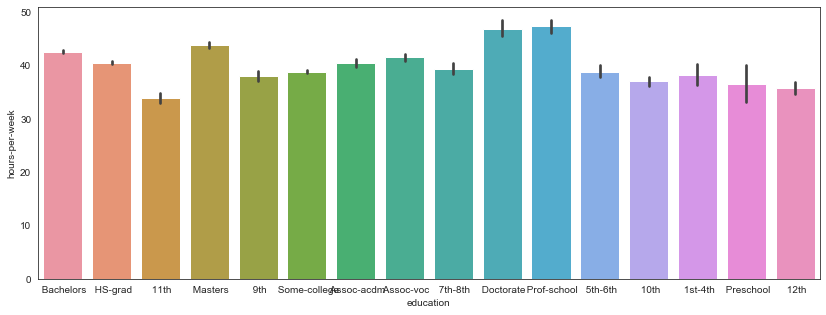

In [27]:
# The below bar plot shows the hours per week according to the education of the person

plt.figure(figsize= (14,5))
sns.barplot(x = df_income['education'], y = df_income['hours-per-week'], data = df_income)

The individuals having education to Prof-school, Doctorate, Masters and bachelors usually works more than 40 hours per week. Rest are lying in the range 35-40 hours per week. Thus, 40 hrs per week is the average time individuals are engaged in work.

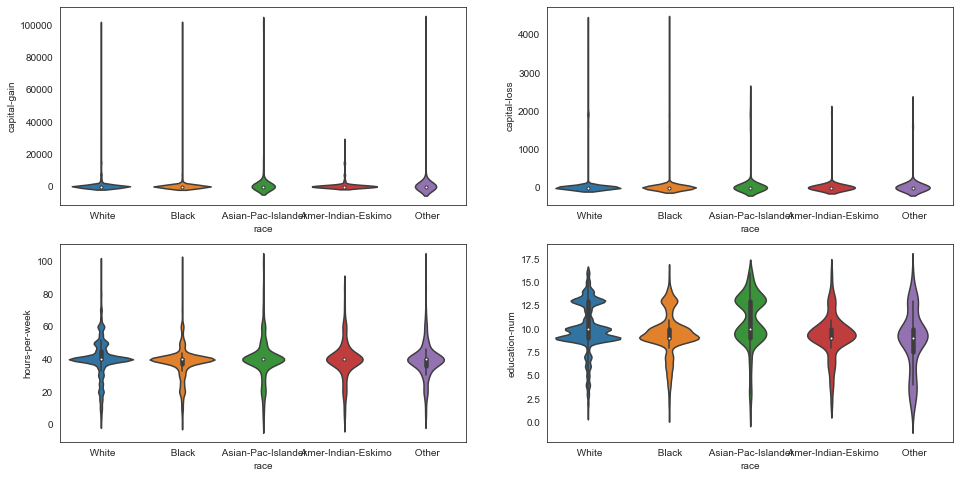

In [28]:
# This Violin plot show how capital gain,capital loss, hours per week and education vary with the race of the people

plt.figure(figsize= (16,8))
plt.subplot(2,2,1)
sns.violinplot(x = df_income['race'], y = df_income['capital-gain'], data = df_income);
plt.subplot(2,2,2)
sns.violinplot(x = df_income['race'], y = df_income['capital-loss'], data = df_income);
plt.subplot(2,2,3)
sns.violinplot(x = df_income['race'], y = df_income['hours-per-week'], data = df_income);
plt.subplot(2,2,4)
sns.violinplot(x = df_income['race'], y = df_income['education-num'], data = df_income);

<Figure size 1440x1296 with 0 Axes>

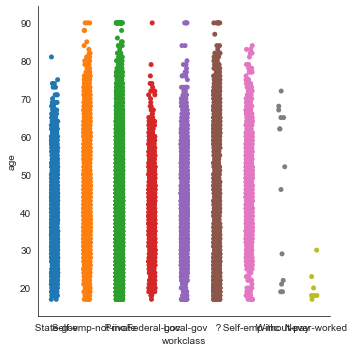

In [29]:
# This catplot shows the relationship between age and workclass

plt.figure(figsize= (20,18))
sns.catplot(x="workclass", y="age", data=df_income)
plt.show()

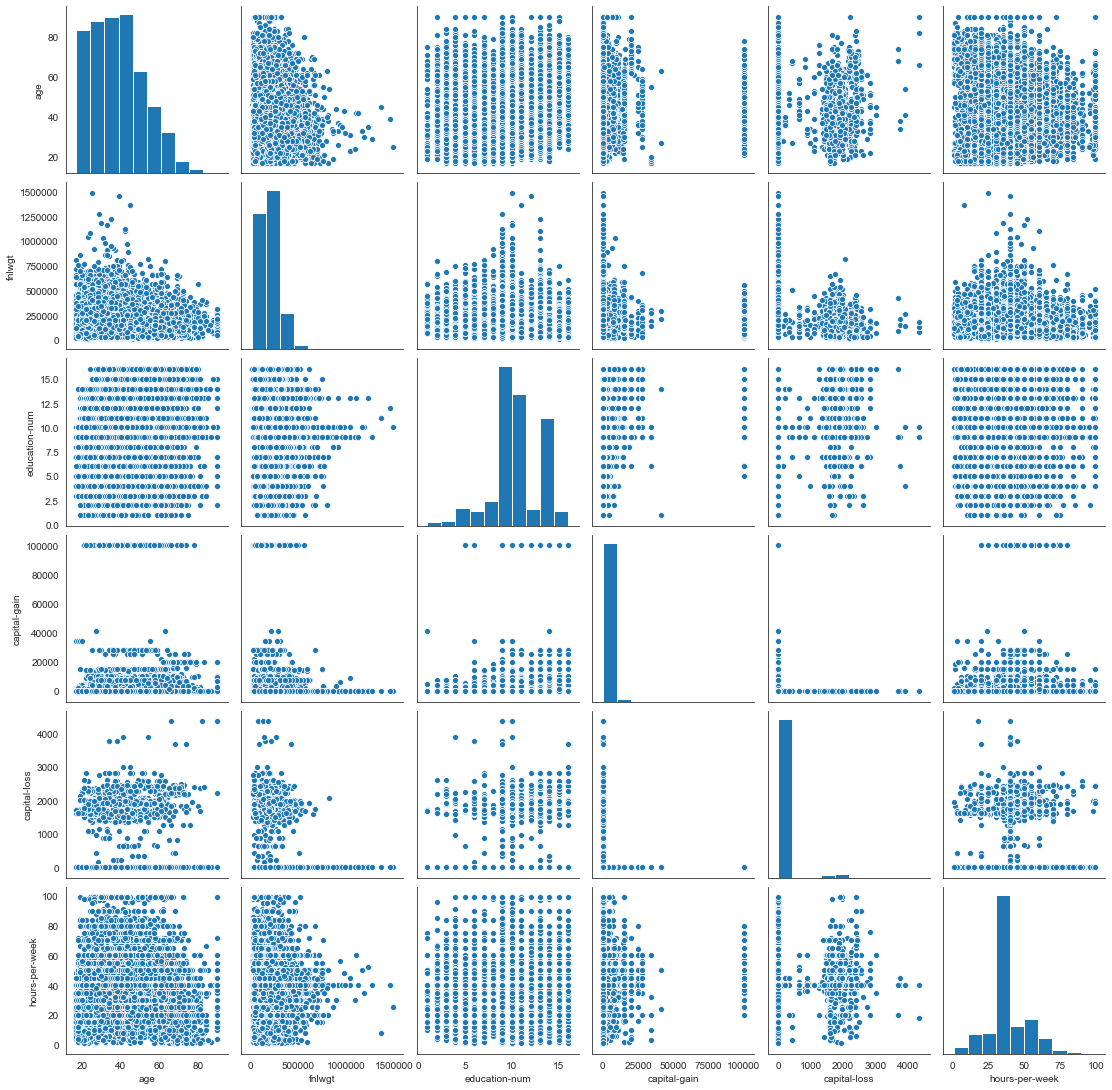

In [30]:
# Let's see the pairplot.

sns.pairplot(df_income, palette="husl")

In [31]:
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# Using the LabelEncoder in order to convert the categorical data into numerical. For categorical we have earlier, already made a list named inc_cat.

from sklearn.preprocessing import LabelEncoder

lb = {}
for i, feature in enumerate(inc_cat):
    lb[feature] = LabelEncoder()
    df_income[feature] = lb[feature].fit_transform(df_income[feature])

df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


So, now the final data is ready having all numerical values or columns/features being numerical in nature.

In [33]:
df_income.shape

(32561, 15)

In [34]:
# Let's check the skewness of the data before removing the outliers.

df_income.skew()

age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education-num     -0.311676
marital-status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
native-country    -3.658303
income             1.212430
dtype: float64

The data is somewhat skewed which needs to be treated.

In [35]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_income))
print(z.shape)

# Removing the outliers.

df_hr = df_income.loc[(z<3).all(axis=1)]
print(df_income.shape)

(32561, 15)
(32561, 15)


Now it is not showing as no outliers present.

In [36]:
# Treating the skewness using sqrt function.

for col in df_income.columns:
    if df_income.skew().loc[col]>0.55:
        df_income[col]=np.sqrt(df_income[col])

In [37]:
# Let's again check the skewness after the treatment.

df_income.skew()

age               0.204327
workclass        -0.752024
fnlwgt            0.189115
education        -0.934042
education-num    -0.311676
marital-status   -0.013508
occupation        0.114583
relationship      0.150778
race             -2.435386
sex              -0.719293
capital-gain      5.894582
capital-loss      4.376357
hours-per-week    0.227643
native-country   -3.658303
income            1.212430
dtype: float64

So, the skewness has been reduced to it's possible extent.

The cleaning of the data is done. So now, let's move further and do the testing and training of databy splitting the target and rest variables and selecting the best model through various algorithms and evaluation can be done.

In [38]:
# Let's Separating the input and target variables

X = df_income.drop(columns=["income"])
y = df_income[["income"]]

In [39]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(32561, 14)
(32561, 1)


In [40]:
# Let's check the head of the input variables.
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,6.244998,7,278.416954,9,13,4,1,1.000000,4,1,46.626173,0.0,40,39
1,7.071068,6,288.636450,9,13,2,4,0.000000,4,1,0.000000,0.0,13,39
2,6.164414,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39
3,7.280110,4,484.480134,1,7,2,6,0.000000,2,1,0.000000,0.0,40,39
4,5.291503,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5


In [41]:
# Let's check the head of the output variables.
y.head()

,income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [42]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.11923331,  2.15057856, -1.17386922, ..., -0.2198685 ,
        -0.03542945,  0.29156857],
       [ 0.8771825 ,  1.46373585, -1.08846337, ..., -0.2198685 ,
        -2.22215312,  0.29156857],
       [ 0.04529456,  0.09005041,  0.38022654, ..., -0.2198685 ,
        -0.03542945,  0.29156857],
       ...,
       [ 1.37696949,  0.09005041, -0.24338947, ..., -0.2198685 ,
        -0.03542945,  0.29156857],
       [-1.30715261,  0.09005041,  0.2506855 , ..., -0.2198685 ,
        -1.65522476,  0.29156857],
       [ 1.00566949,  0.77689313,  0.98370706, ..., -0.2198685 ,
        -0.03542945,  0.29156857]])

In [43]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

In [51]:
# Splitting the training and testing data and finding the maximum accuracy score at best random state.

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")      
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)
    print("\n")

In [52]:
# Let's check the accuracy score and other matrices as well as the cross validation score of different algorithms.

print("-------Logistic Regression-------")
lr = LogisticRegression()
r_state = m(lr, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------GaussianNB-------")
gnb = GaussianNB()
r_state = m(gnb, X, y)
print("Cross validation score :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, X, y)
print("Cross validation score :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------SVC-------")
sv = SVC()
r_state = m(sv, X, y)
print("Cross validation score :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, X, y)
print("Cross validation score :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------RandomForestClassifier-------")
rfc = RandomForestClassifier()
r_state = m(rfc, X, y)
print("Cross validation score :", cross_val_score(rfc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(rfc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------Logistic Regression-------
Maximum Accuracy score is : 0.8401658222017504 achieved at : 76


Classification Report :
               precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      5419
         1.0       0.50      0.73      0.60      1094

    accuracy                           0.83      6513
   macro avg       0.72      0.79      0.74      6513
weighted avg       0.87      0.83      0.84      6513



Confusion Matrix :
 [[4617  802]
 [ 291  803]]


ROC_AUC_CURVE : 0.7930029353689183


Cross validation score : 0.8304414748277024
Standard Deviationscore : 0.002454823973934364


-------GaussianNB-------
Maximum Accuracy score is : 0.8238906801781053 achieved at : 74


Classification Report :
               precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      5202
         1.0       0.54      0.66      0.60      1311

    accuracy                           0.82      6513
   macro avg       0.73      0.76

RandomForestClassifier is selected as a model for this dataset as it is giving the best results out of all the algorithms tested, with the accuracy of 0.865 at 76.

In [46]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rfc, 'rf_cencus_income.pkl')

['rf_cencus_income.pkl']